<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Pabloacostatec-A01794035-/blob/main/Semana_8_Data_Analysis_with_Python_(IBM)_A01794035_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juan Pablo Acosta López

#1.- Model evaluation

Nos dice como el modelo se desempeña ya en producción, generalmente se debe de separar los datos en 2 grupos o 3 - Entrenamiento/Validación y Prueba.

Utilizando muchos datos se puede hacer una estimación acertada al desempeño del modelo en un entorno de producción.

Para evitar mucha variabilidad a la hora de medir el modelo se recomienda hacer una partición kfold, que implica básicamente separar tus datos en grupos y hacer combinaciones de cantidad de grupos a utilizar en entreamiento y cantidad de grupos a utilizar en validación. En python se utilizan las funciones cross_val_score y cross_val_predict para usar kfold correctamente

#2.- Overfitting, underfitting

Cuando un modelo se ajusta demasiado bien a un set de entrenamiento se considera un caso de "overfitting" y esto implica que tu modelo probablemente no vaya a tener un buen desempeño en producción. Por otro lado el "underfitting" implica que tu modelo no es lo sufucientemente complejo para predecir correctamente los valores en producción

#3.- Ridge Regression

Es una regresión que prevee overfitting asignandole pesos diferentes a los vectores de las ecuaciones predictoras

#4.- Gridsearch

Gridsearch permite iterar los hiperparámetros de cualquier modelo de inteligencia artificial de tal manera que nos regresa los mejores valores de la mejor combinatoria de hiperparámetros

#5.- Laboratory

In [1]:
input = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Transform into DF
df = pd.read_csv(input)
df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [2]:
x_data=df.drop('price',axis=1)
y_data = df['price']

from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120



Question #2):
Find the R^2 on the test data using 40% of the dataset for testing.


In [3]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression()

lre.fit(x_train1[['horsepower']], y_train1)

print(lre.score(x_test1[['horsepower']], y_test1))
print(lre.score(x_train1[['horsepower']], y_train1))

0.7139364665406973
0.5754067463583004


Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 

In [4]:
from sklearn.model_selection import cross_val_score

Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

pr1=PolynomialFeatures(degree=2)

x_train_pr1=pr1.fit_transform(x_train1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


How many dimensions does the new feature have? Hint: use the attribute "shape". 

In [7]:
x_train_pr1.shape

(120, 15)


Question #4d):
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.


In [8]:
poly1=LinearRegression().fit(x_train_pr1,y_train1)

Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


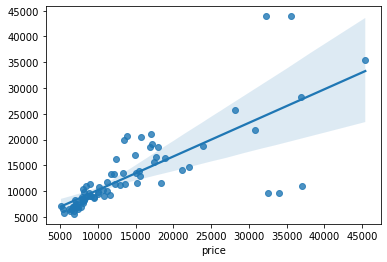

In [11]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
sns.regplot(y_test1, yhat_test1)

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

In [14]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=10) 
RidgeModel.fit(x_train_pr1, y_train1)
RidgeModel.score(x_test_pr1, y_test1)

0.5665871819508925

Gridsearch

In [15]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

RR=Ridge()
RR

Grid1 = GridSearchCV(RR, parameters1,cv=4)

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

BestRR=Grid1.best_estimator_
BestRR


Ridge(alpha=10000)

In [17]:
BestRR.score(x_test1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test1)

0.8348752877924303

FIN